Found 34 tensors with length 0 at indices: [810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 2460, 2501, 2512, 2583, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423]


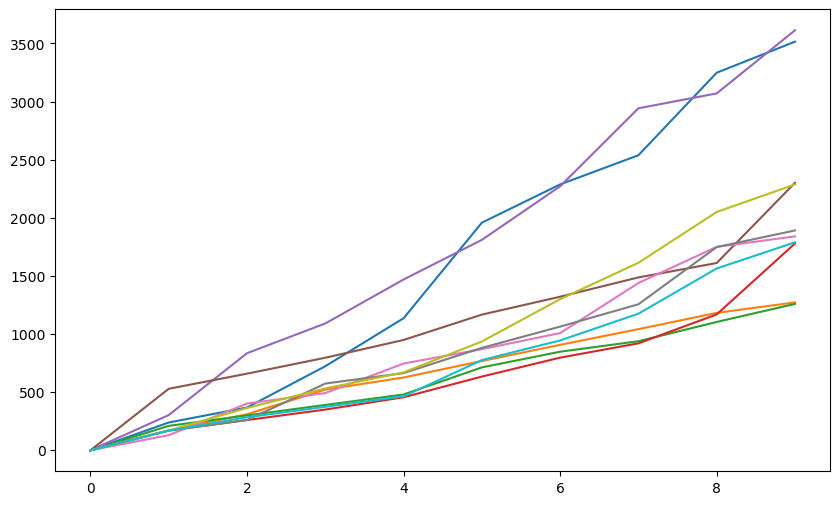

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

%run data_prep_one_hero.ipynb

In [2]:
X_scaled_ts = torch.tensor(X_scaled.values, dtype=torch.float32)
Y_scaled_ts = torch.tensor(y_scaled.values, dtype=torch.float32)

Scaling per Tensor

In [20]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
Y_tensor = torch.tensor(y.values, dtype=torch.float32)

X_min = X_tensor.min(dim=1, keepdim=True)[0]
X_max = X_tensor.max(dim=1, keepdim=True)[0]
X_tensor = (X_tensor - X_min) / (X_max - X_min)

Y_min = Y_tensor.min(dim=1, keepdim=True)[0]
Y_max = Y_tensor.max(dim=1, keepdim=True)[0]
Y_tensor = (Y_tensor - Y_min) / (Y_max - Y_min)

### Train Test Split



In [ ]:
def train_split(series): 
    """ Split a series into training material and testing material
     
      Args:
        series: a time series from Pandas, pd.Series
    """
    train_size_dota = int(len(series) * 0.67) 
    test_size_dota = len(series) - train_size_dota
    train_dota, test_dota = series[:train_size_dota], series[train_size_dota:]

    return train_dota, test_dota

In [ ]:
train_scaled, test_scaled = train_split()

In [27]:
# train-test split for time series
train_size = int(len(X_tensor) * 0.67)
test_size = len(X_tensor) - train_size
train, test = X_tensor[:train_size], Y_tensor[train_size:]

In [22]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [23]:
input_size = 1
hidden_size = 64
num_layers = 2
output_size = 2
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

In [24]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
num_epochs = 100
for epoch in range(num_epochs):
    inputs = X_tensor.unsqueeze(-1)
    targets = Y_tensor
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: nan
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


In [ ]:
with torch.no_grad():
    test_input = X_tensor.unsqueeze(-1)
    predicted = model(test_input)
    print("Predicted values:")
    print(predicted)